<a href="https://colab.research.google.com/github/alldofaiz123/Pemrograman_python/blob/main/Phyton_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [55]:
ls

'1101194223_Alldo Faiz Ramadhani.jpg'
'1101194223_PDA_Alldo Faiz Ramadhani.pdf'
'1101194223 Registrasi | Telkom University (1).pdf'
'1101194223 Registrasi | Telkom University.pdf'
 1547478711733.jpg
 20150601_194426.jpg
'Alldo Faiz Ramadhani_1101194223.pdf'
'Alldo Faiz Ramadhani_1101194223_TT-43-02.pdf'
'Alldo Faiz Ramadhani(Maaf bu pdfnya eror, jadi bacanya dari slide terakhir yang ke pertama ya ).pdf'
 Alldo.jpg
 Arik.jpeg
 Bagi
'Big 6 Smart Door Lock.gdoc'
 bismillahsong.mp3
'CamScanner 04-30-2020 09.33.13.pdf'
 canon/
'chord think a loud.pdf'
 Classroom/
'Colab Notebooks'/
'daftar isi.docx'
 dataset/
 dooc.jpeg
 Fajar.jpeg
'Feel Good.zip'
'Fl 20'/
'Fl studio preset'/
'Fl Studio Project'/
'Format laporan Iuran BPJS TK JAMINAN PENSIUN.xlsx'
'Formulir tanpa judul (1).gform'
'Formulir tanpa judul.gform'
'Foto dari Alldo Faiz'
'Foto dari Alldo Faiz (1)'
'Foto dari Alldo Faiz (2)'
'Foto dari Alldo Faiz (3)'
'Foto Google'/
 Gamel.rar
'Gmail - Fwd: e-Ticket Lion Air & Kalstar KNO-CGK-PNK 0

In [56]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [57]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [58]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [59]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [60]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [61]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [62]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 240, 240, 3)
(146, 240, 240, 3)


In [63]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 238, 238, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 107648)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10764900  
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [64]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [65]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 17s 1s/step - loss: 6.4638 - accuracy: 0.2260 - val_loss: 1.5828 - val_accuracy: 0.4178
Epoch 2/25
14/14 [==============================] - 17s 1s/step - loss: 1.4999 - accuracy: 0.3607 - val_loss: 1.3691 - val_accuracy: 0.5205
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 1.1120 - accuracy: 0.6119 - val_loss: 1.0062 - val_accuracy: 0.6301
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 0.6906 - accuracy: 0.7511 - val_loss: 0.9032 - val_accuracy: 0.6507
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 0.4164 - accuracy: 0.8721 - val_loss: 0.7812 - val_accuracy: 0.7123
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.2282 - accuracy: 0.9429 - val_loss: 0.6621 - val_accuracy: 0.7808
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.1318 - accuracy: 0.9635 - val_loss: 0.8093 - val_accuracy: 0.7671
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


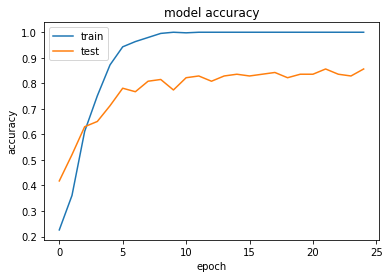

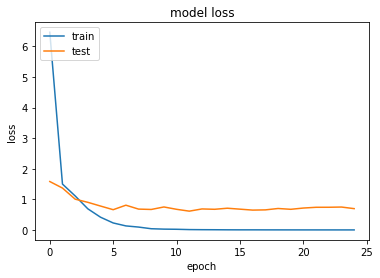

In [66]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.69      0.86      0.77        21
      GMB_02       0.94      0.89      0.92        37
      GMB_03       0.97      0.85      0.90        33
      GMB_04       0.87      0.79      0.83        33
      GMB_05       0.77      0.91      0.83        22

    accuracy                           0.86       146
   macro avg       0.85      0.86      0.85       146
weighted avg       0.87      0.86      0.86       146



In [68]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets
